In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [24]:
df = pd.read_csv("Cryogenic Storage Tank Sales data.xlsx - Cryogenic sales data.csv")
df 

,Row ID,Order ID,Ship Date,month_Year,Year,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Product name,Sales in Thousands,Quantity,Discount,Profit
0,1,CA-2016-152156,11-11-2022,2022-11,2022.0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Cryogenic storage tanks,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-11-2022,2022-11,2022.0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Cryogenic storage tanks,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,16-06-2022,2022-06,2022.0,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Cryogenic storage tanks,14.6200,2,0.00,6.8714
3,4,US-2015-108966,18-10-2021,2021-10,2021.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Cryogenic storage tanks,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,18-10-2021,2021-10,2021.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Cryogenic storage tanks,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,23-01-2020,2020-01,2020.0,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Cryogenic storage tanks,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,03-03-2023,2023-03,2023.0,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Cryogenic storage tanks,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,03-03-2023,2023-03,2023.0,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Cryogenic storage tanks,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,03-03-2023,2023-03,2023.0,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Cryogenic storage tanks,29.6000,4,0.00,13.3200


In [25]:
df.isnull().sum()

Row ID                0
Order ID              0
Ship Date             0
month_Year            0
Year                  1
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Country               0
City                  0
State                 0
Postal Code           0
Region                0
Product ID            0
Product name          0
Sales in Thousands    0
Quantity              0
Discount              0
Profit                0
dtype: int64

In [26]:
y = df['Sales in Thousands']  # Target variable
x = df['month_Year']
print(y)

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales in Thousands, Length: 9994, dtype: float64


In [27]:
df_encoded = pd.get_dummies(df, columns=['month_Year'])
df_encoded

,Row ID,Order ID,Ship Date,Year,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,month_Year_2023-04,month_Year_2023-05,month_Year_2023-06,month_Year_2023-07,month_Year_2023-08,month_Year_2023-09,month_Year_2023-10,month_Year_2023-11,month_Year_2023-12,month_Year_2024-01
0,1,CA-2016-152156,11-11-2022,2022.0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0,0,0,0,0,0,0,0,0,0
1,2,CA-2016-152156,11-11-2022,2022.0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0,0,0,0,0,0,0,0,0,0
2,3,CA-2016-138688,16-06-2022,2022.0,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,0,0,0,0,0,0,0,0,0,0
3,4,US-2015-108966,18-10-2021,2021.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0,0,0,0,0,0,0,0,0,0
4,5,US-2015-108966,18-10-2021,2021.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,23-01-2020,2020.0,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,0,0,0,0,0,0,0,0,0,0
9990,9991,CA-2017-121258,03-03-2023,2023.0,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,0,0,0,0,0,0,0,0,0,0
9991,9992,CA-2017-121258,03-03-2023,2023.0,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,0,0,0,0,0,0,0,0,0,0
9992,9993,CA-2017-121258,03-03-2023,2023.0,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,0,0,0,0,0,0,0,0,0,0


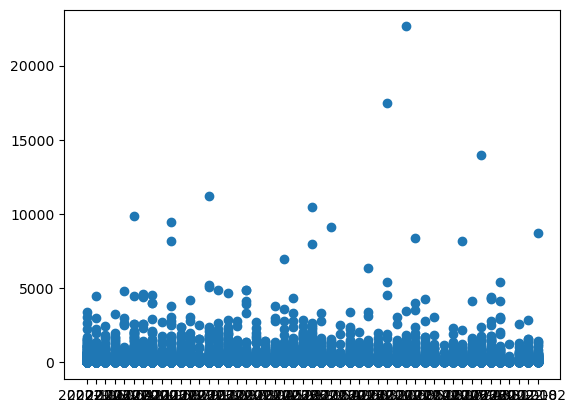

In [28]:
plt.scatter(x, y)
plt.show()

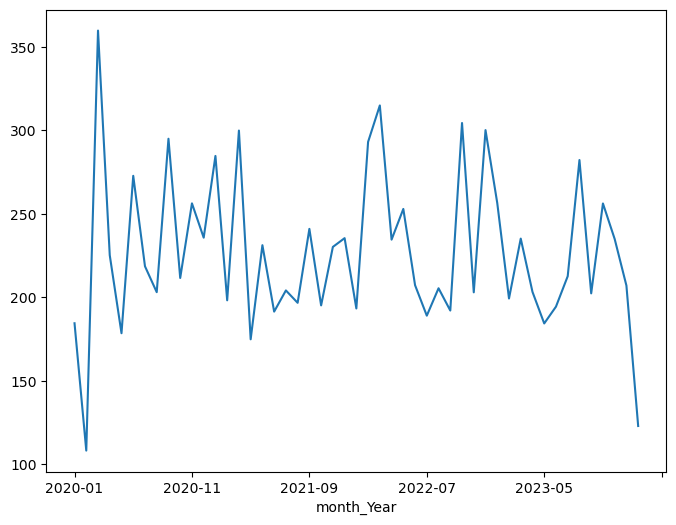

In [29]:
line_plot = df.groupby('month_Year')['Sales in Thousands'].mean()
plt.figure(figsize=(8, 6))
line_plot.plot()
plt.show()

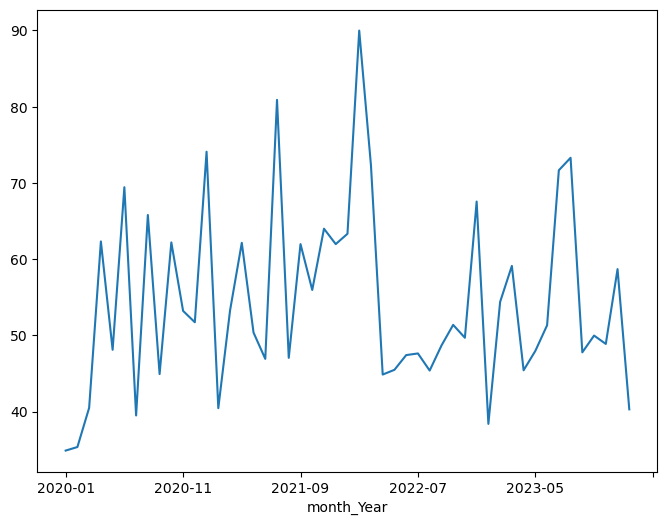

In [30]:
line_plot = df.groupby('month_Year')['Sales in Thousands'].median()
plt.figure(figsize=(8, 6))
line_plot.plot()
plt.show()

In [31]:
X = df_encoded.drop(["Row ID","Order ID","Ship Date","Year","Ship Mode","Customer ID","Customer Name","Segment","Country","City","State","Postal Code","Region","Product ID","Product name","Sales in Thousands","Quantity","Discount","Profit"], axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [35]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [36]:
mse=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)

-340371.46184151014

In [37]:
y_pred=model.predict(X_test)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.71930388e+13, -1.01655266e+15, -8.40047171e+14, ...,
       -6.41029572e+14, -6.93875472e+14,  1.77218487e+14])

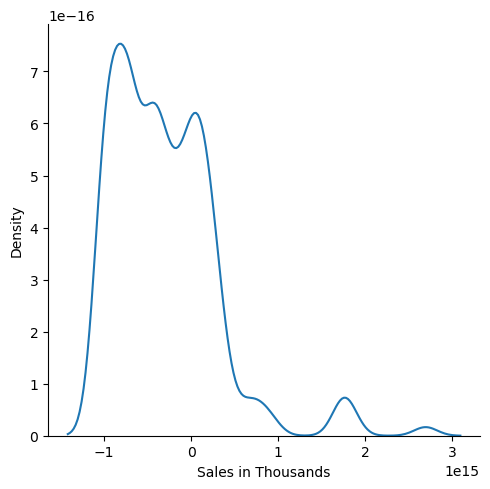

In [38]:
import seaborn as sns
sns.displot(y_pred-y_test,kind='kde')

In [39]:
score=r2_score(y_pred,y_test)
score

-0.2494503257678884

In [40]:
slope = model.coef_[0]
intercept = model.intercept_

In [ ]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
##cross validation
from sklearn.model_selection import cross_val_score
model = LinearRegression()
model.fit(X_train, y_train)
mse=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
import seaborn as sns
sns.displot(y_pred-y_test,kind='kde')

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
score

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge_regressor=Ridge()

In [ ]:
ridge_regressor

In [ ]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

In [ ]:
print(ridgecv.best_params_)

In [ ]:
print(ridgecv.best_score_)

In [ ]:
ridge_pred=ridgecv.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals = ridge_pred - y_test

# Plot KDE of residuals using Matplotlib
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, density=True, alpha=0.5, color='blue')  # Histogram
sns.kdeplot(residuals, color='red')  # KDE plot
plt.title('Kernel Density Estimate of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend(['KDE', 'Histogram'])
plt.show()

In [ ]:
score=r2_score(ridge_pred,y_test)
score

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso=Lasso()

In [ ]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

In [ ]:
print(lassocv.best_params_)
print(lassocv.best_score_)

In [ ]:
lasso_pred=lassocv.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Calculate residuals
residuals = lasso_pred - y_test

# Create KDE using scipy.stats.gaussian_kde
kde = gaussian_kde(residuals)

# Define range of x values for plotting
x_values = np.linspace(min(residuals), max(residuals), 100)

# Plot KDE
plt.figure(figsize=(8, 6))
plt.plot(x_values, kde(x_values), color='blue')
plt.fill_between(x_values, kde(x_values), alpha=0.3, color='blue')  # Fill area under the curve
plt.title('Kernel Density Estimate of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()
